Code to try out forecasting of T as Output and Humidity as Regressor - Using Linear Regression 

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split



In [22]:
df = pd.read_excel(r'/Users/shailendra0408/Desktop/CSA_Temp.xlsx')
data_array = np.array(df)
print(data_array)
print(df.head())

[[12.7 92. ]
 [12.7 92. ]
 [12.7 91. ]
 ...
 [21.8 69. ]
 [21.1 73. ]
 [20.4 75. ]]
   Temperature  Relative Humidity
0         12.7                 92
1         12.7                 92
2         12.7                 91
3         13.0                 91
4         13.2                 89


In [44]:
T_data, RH_data = data_array[:,0], data_array[:,1]

T_data_train, T_data_test, RH_data_train, RH_data_test = train_test_split(T_data, RH_data, random_state=104, 
                                   test_size=0.75, 
                                   shuffle=True)

T_data_train = T_data_train.reshape(-1,1)
RH_data_train = RH_data_train.reshape(-1,1)
RH_data_test = RH_data_test.reshape(-1,1)
RH_data_train = RH_data_train.reshape(-1,1)

print (RH_data_test, RH_data_train, T_data_test, T_data_train)


[56. 90. 42. ... 79. 51. 94.] [[ 63.]
 [ 43.]
 [ 77.]
 ...
 [101.]
 [ 85.]
 [ 87.]] [20.1 18.3 27.5 ... 16.6 25.4 17.4] [[19.1]
 [25.9]
 [13.8]
 ...
 [10.3]
 [17.4]
 [15.5]]


In [47]:
model = LinearRegression()
model = LinearRegression().fit(T_data_train, RH_data_train)

In [50]:
r_sq = model.score(T_data_train, RH_data_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.6827001270410993
intercept: [131.50246418]
slope: [[-3.11154442]]


In [54]:
RH_data_test = RH_data_test.reshape(-1,1)
Temp_new_data = model.predict(RH_data_test)
Temp_new_data

array([[ -42.74402335],
       [-148.53653363],
       [   0.81759853],
       ...,
       [-114.30954501],
       [ -27.18630125],
       [-160.98271131]])

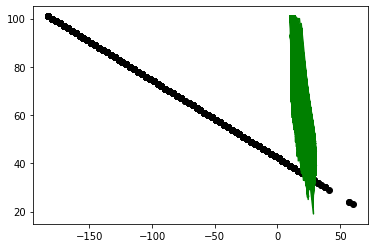

In [56]:
plt.plot(T_data_train,RH_data_train,color='g') 
plt.scatter(Temp_new_data, RH_data_test,color='k') 
plt.show()